<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 3.5em;">Current Methane Concentration, CH4 (NASA)</span>
</div>
<br />


<span style="color:#444; font-family: 'Arial'; font-size: 1.3em;">NOT REAL TIME DATA.<br /><br />
Data taken from: ftp://aftp.cmdl.noaa.gov/products/carbontracker/ch4/fluxes/ </span>
<br />

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib2
from contextlib import closing
import rasterio
import os
import shutil
import netCDF4
%matplotlib inline
np.set_printoptions(threshold='nan')

In [4]:
remote_path = 'ftp://aftp.cmdl.noaa.gov/products/carbontracker/ch4/fluxes/'
last_file = '201012.nc'

local_path = os.getcwd()

print (remote_path)
print (last_file)
print (local_path)

ftp://aftp.cmdl.noaa.gov/products/carbontracker/ch4/fluxes/
201012.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks


In [5]:
with closing(urllib2.urlopen(remote_path+last_file)) as r:
    with open(last_file, 'wb') as f:
        shutil.copyfileobj(r, f)

In [6]:
ncfile = xr.open_dataset(local_path+'/'+last_file, decode_times=False)

In [7]:
print('* Variables disponibles en el fichero:')
for v in ncfile.variables:
    print(v)

* Variables disponibles en el fichero:
time
decimal_date
idate
lon
lat
area1x1
fossil
agwaste
natural
bioburn
ocean
q_fossil
q_bioburn
q_agwaste
q_natural
q_ocean
pfossil
pagwaste
pnatural
pbioburn
pocean
pq_fossil
pq_bioburn
pq_agwaste
pq_natural
pq_ocean


In [8]:
ncfile.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	nd = 6 ;
	time = 1 ;

variables:
	float64 time(time) ;
		time:units = days since 2000-01-01 00:00:00 UTC ;
	float64 decimal_date(time) ;
		decimal_date:units = year ;
	int32 idate(time, nd) ;
		idate:units = NA ;
		idate:long_name = integer UTC date: yyyy mm hh mnmn ss ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:actual_range = [-180.  180.] ;
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:actual_range = [-90.  90.] ;
	float32 area1x1(lat, lon) ;
		area1x1:units = m^2 ;
		area1x1:long_name = 1x1_grid_cell_area ;
		area1x1:standard_name = area1x1 ;
	float32 fossil(time, lat, lon) ;
		fossil:units = mg m-2 day-1 ;
		fossil:long_name = fossil_fuel_flux ;
		fossil:comment = optimized surface CH4 flux due to coal and oil/gas production ;
	float32 agwaste(time, lat, lon) ;
		agwaste:units = m

In [9]:
ncfile.variables

Frozen(OrderedDict([(u'time', <xarray.IndexVariable u'time' (time: 1)>
array([ 3998.])
Attributes:
    units:    days since 2000-01-01 00:00:00 UTC), (u'decimal_date', <xarray.Variable (time: 1)>
array([ 2010.953425])
Attributes:
    units:    year), (u'idate', <xarray.Variable (time: 1, nd: 6)>
array([[2010,   12,   15,    0,    0,    0]], dtype=int32)
Attributes:
    units:      NA
    long_name:  integer UTC date: yyyy mm hh mnmn ss), (u'lon', <xarray.IndexVariable u'lon' (lon: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Attributes:
    units:          degrees_east
    long_name:      longitude
    standard_name:  longitude
    actual_range:   [-180.  180.]), (u'lat', <xarray.IndexVariable u'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59

<br />
<span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 2.5em;">Visualizing Data</span>
<br />

In [7]:
# open a local NetCDF file or remote OPeNDAP URL
url = url=local_path+'/'+last_file
nc = netCDF4.Dataset(url)

# examine the variables
print nc.variables.keys()
print nc.variables['fossil']

# sample every 10th point of the 'z' variable
fossil = nc.variables['fossil'][0,:,:]
print 'Shape: ',fossil.shape
agwaste = nc.variables['agwaste'][0,:,:]
print 'Shape: ',agwaste.shape
natural = nc.variables['natural'][0,:,:]
print 'Shape: ',natural.shape
bioburn = nc.variables['bioburn'][0,:,:]
print 'Shape: ',bioburn.shape
ocean = nc.variables['ocean'][0,:,:]
print 'Shape: ',ocean.shape

topo = [a + b + c + d + e for a, b, c, d, e in zip(fossil, agwaste, natural, bioburn, ocean)]
#print topo

[u'time', u'decimal_date', u'idate', u'lon', u'lat', u'area1x1', u'fossil', u'agwaste', u'natural', u'bioburn', u'ocean', u'q_fossil', u'q_bioburn', u'q_agwaste', u'q_natural', u'q_ocean', u'pfossil', u'pagwaste', u'pnatural', u'pbioburn', u'pocean', u'pq_fossil', u'pq_bioburn', u'pq_agwaste', u'pq_natural', u'pq_ocean']
<type 'netCDF4._netCDF4.Variable'>
float32 fossil(time, lat, lon)
    units: mg m-2 day-1
    long_name: fossil_fuel_flux
    comment: optimized surface CH4 flux due to coal and oil/gas production
unlimited dimensions: 
current shape = (1, 180, 360)
filling off

Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)


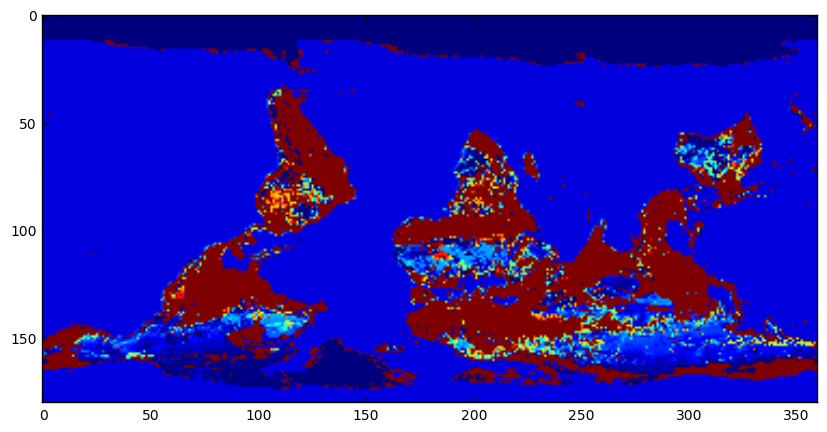

In [11]:
# Ploting
plt.figure(figsize=(10,10))
plt.imshow(topo,clim=(0.0, 1))

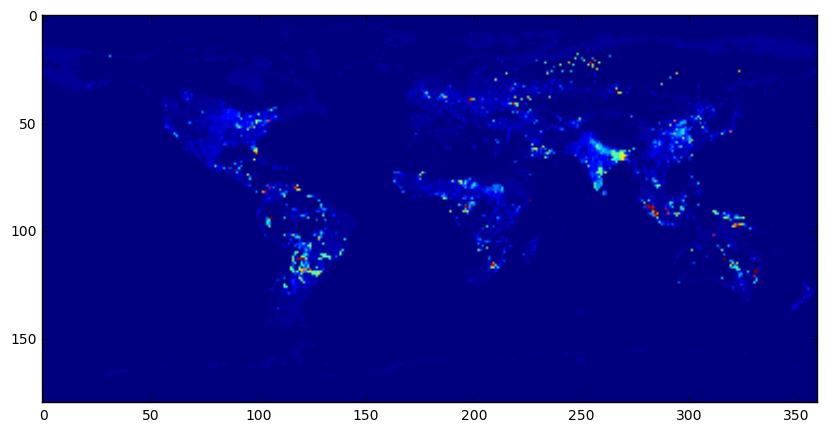

In [26]:
for i in reversed(topo):
    data = list(reversed(topo))

plt.figure(figsize=(10,10))
plt.imshow(data,clim=(0.0, 200))

<br />
<span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 2.5em;">GitHub Script</span>
<br />

In [37]:
import numpy as np
from contextlib import closing
import urllib2
import shutil
import os
from netCDF4 import Dataset
import rasterio
import tinys3
import netCDF4

In [38]:
def dataDownload(): 
    remote_path = 'ftp://aftp.cmdl.noaa.gov/products/carbontracker/ch4/fluxes/'
    last_file = '201012.nc'

    local_path = os.getcwd()

    print (remote_path)
    print (last_file)
    print (local_path)

    with closing(urllib2.urlopen(remote_path+last_file)) as r:
        with open(last_file, 'wb') as f:
            shutil.copyfileobj(r, f)
    
    return last_file

In [39]:
def netcdf2tif(dst,outFile):
    local_path = os.getcwd()
    url = local_path+'/'+dst
    nc = netCDF4.Dataset(url)

    # examine the variables
    print nc.variables.keys()

    # sample every 10th point of the 'z' variable
    fossil = nc.variables['fossil'][0,:,:]
    print 'Shape: ',fossil.shape
    agwaste = nc.variables['agwaste'][0,:,:]
    print 'Shape: ',agwaste.shape
    natural = nc.variables['natural'][0,:,:]
    print 'Shape: ',natural.shape
    bioburn = nc.variables['bioburn'][0,:,:]
    print 'Shape: ',bioburn.shape
    ocean = nc.variables['ocean'][0,:,:]
    print 'Shape: ',ocean.shape

    topo = [a + b + c + d + e for a, b, c, d, e in zip(fossil, agwaste, natural, bioburn, ocean)]

    for i in reversed(topo):
        data = list(reversed(topo))
    
    data = np.asarray(data)
    
    data[data < 0] = -1

    # Return lat info
    south_lat = -90
    north_lat = 90

    # Return lon info
    west_lon = -180
    east_lon = 180
    # Transformation function
    transform = rasterio.transform.from_bounds(west_lon, south_lat, east_lon, north_lat, data.shape[1], data.shape[0])
    # Profile
    profile = {
        'driver':'GTiff', 
        'height':data.shape[0], 
        'width':data.shape[1], 
        'count':1, 
        'dtype':np.float64, 
        'crs':'EPSG:4326', 
        'transform':transform, 
        'compress':'lzw', 
        'nodata': -1
    }
    with rasterio.open(outFile, 'w', **profile) as dst:
        dst.write(data.astype(profile['dtype']), 1)

In [40]:
def s3Upload(outFile):
    # Push to Amazon S3 instance
    conn = tinys3.Connection(os.getenv('S3_ACCESS_KEY'),os.getenv('S3_SECRET_KEY'),tls=True)
    f = open(outFile,'rb')
    conn.upload(outFile,f,os.getenv('BUCKET'))

In [41]:
# Execution
outFile ='methane.tif'
print 'starting'
file = dataDownload()
print 'downloaded'
netcdf2tif(file,outFile)
print 'converted'
#s3Upload(outFile)
print 'finish'

starting
ftp://aftp.cmdl.noaa.gov/products/carbontracker/ch4/fluxes/
201012.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks
downloaded
[u'time', u'decimal_date', u'idate', u'lon', u'lat', u'area1x1', u'fossil', u'agwaste', u'natural', u'bioburn', u'ocean', u'q_fossil', u'q_bioburn', u'q_agwaste', u'q_natural', u'q_ocean', u'pfossil', u'pagwaste', u'pnatural', u'pbioburn', u'pocean', u'pq_fossil', u'pq_bioburn', u'pq_agwaste', u'pq_natural', u'pq_ocean']
Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)
Shape:  (180, 360)
converted
finish
